# Multiple Linear Regression

## Library

In [1]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest

Analyze tips data from seaborn   
- Total Bill and Size as Independent Variable  
- Tips as Dependent Variable  

Analyze the relationship  
Apply Multiple Linear Regression  
Perform F Test and T Test  
Interpret the result  

use α 5%


## Dataset

Framing the problem :  
1. Problem Statements : How migh we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :  
  1. Label : Tips  
  1. Features : Total Bill and Size   
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.  
1. Action : Make food servers allocation   
1. Value : the sake of staff morale  

In [2]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Analysis

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [5]:
tips[['size','total_bill','tip']]

,size,total_bill,tip
0,2,16.99,1.01
1,3,10.34,1.66
2,3,21.01,3.50
3,2,23.68,3.31
4,4,24.59,3.61
...,...,...,...
239,3,29.03,5.92
240,2,27.18,2.00
241,2,22.67,2.00
242,2,17.82,1.75


In [6]:
tips[['size','total_bill','tip']].describe()

,size,total_bill,tip
count,244.000000,244.000000,244.000000
mean,2.569672,19.785943,2.998279
std,0.951100,8.902412,1.383638
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.000000,17.795000,2.900000
75%,3.000000,24.127500,3.562500
max,6.000000,50.810000,10.000000


In [7]:
normaltest(tips['tip'])

NormaltestResult(statistic=79.37862574074785, pvalue=5.796294322907102e-18)

In [37]:
tips[['size','total_bill','tip']].corr('spearman')

,size,total_bill,tip
size,1.000000,0.604791,0.468268
total_bill,0.604791,1.000000,0.678968
tip,0.468268,0.678968,1.000000


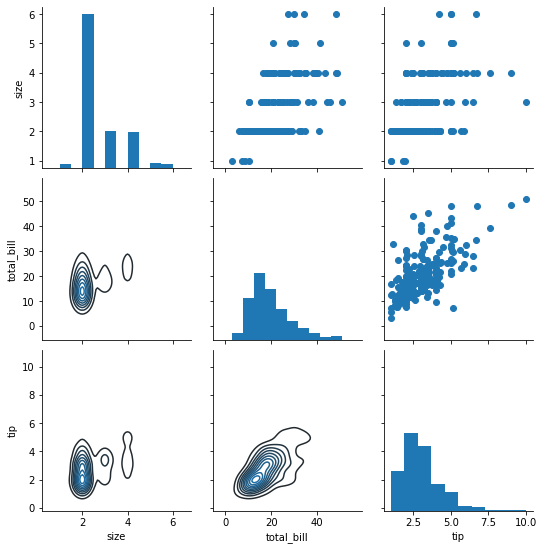

In [13]:
g= sns.PairGrid(tips[['size','total_bill','tip']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

## Model

- Y : Tips
- x : Total Bill and Size

In [15]:
sm_lm=sm.OLS(tips['tip'], sm.add_constant(tips[['total_bill','size']]))
result=sm_lm.fit()

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           9.67e-34
Time:                        09:31:59   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

## Interpretation

F-test  
B1, B2: p-value (Prob (F-statistic))<= 0.05, artinya ada cukup bukti bahwa setidaknya salah satu variabel independen (antara `total_bill` dan `size`) memiliki pengaruj signifikan terhadap nilai `tip`.  

Partial Test (T-test)  
1. B0: p-val(P>|t|) <= 0.05, tapi dalam kasus ini intersep tidak relevan, karena ketika `size` dan `total_bill` =0, tidak mungkin ada tip yang diberikan.  
2. B1 (`total_bill`): p-val<=0.05, artinya, ada cukup bukti bahwa peningkatan nilai `total_bill` meningkatkan nilai `tip`.  
3. B2 {`size`): p-val<=0.05, artinya, ada cukup bukti bahwa peningkatan nilai `size` meningkatkan nilai `tip`.  

Parameter estimate (coef)  
1. B0= 0.669: Tidak memiliki arti untuk diinterpretasikan
2. B1= 0.093: Ketika nilai `total bill` meningkat sebesar 1 USD dan nilai variabel lain (`size`) tetap, maka nilai `tip` akan meningkat sebesar 0.093 USD. (Perhatikan bahwa interpretasi ini direkomendasikan untuk nilai `total_bill` 3.07-50.81 USD)  
3. B2= 0.193: Ketika nilai `size` bertambah 1 dan nilai variabel lain tetap, maka nilai `tip` akan meingkat sebesar 0.193 USD. (Perhatikan bahwa interpretasi ini direkomendasikan untuk nilai `size` 1-6)  

Coefficient Determination:  
R-squared adj= 46.3% : model yang kita buat bisa menjelaskan 46.3% dari varian `tip`.

*dengan menambah variabel `size`, nilai R-square meningkat dari 45.7% menjadi 46.3%

# Diagnostic & Collinearity

Analyze tips data from seaborn 
- Total Bill and Size as Independent Variable
- Tips as Dependent Variable

Apply Multiple Linear Regression -Done  

Check The Normality Assumption  
Check The Gauss-Markov Assumption  
Check The Multicollinearity  


## Normality Assumption

In [19]:
result.resid #nilai residual dari model

0     -1.619340
1     -0.545394
2      0.305355
3      0.060408
4     -0.109157
         ...   
239    1.981794
240   -1.574089
241   -1.155952
242   -0.956292
243    0.204703
Length: 244, dtype: float64

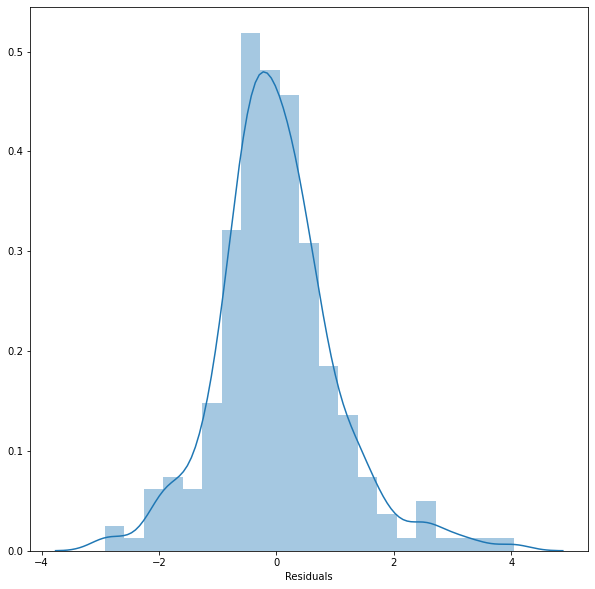

In [22]:
# histogram
plt.figure(figsize=(10,10))
sns.distplot(result.resid)
plt.xlabel('Residuals')
plt.show()
#terlihat normal

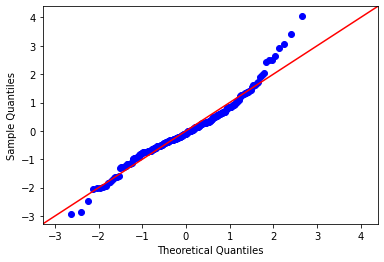

In [25]:
sm.qqplot(result.resid, line='45') #kalau data sangat banyak, disarankan pakai qqplot
plt.show()

#relatif normal

## Gauss-Markov Assumptions

In [27]:
result.fittedvalues #hasil prediksi berdasarkan model

0      2.629340
1      2.205394
2      3.194645
3      3.249592
4      3.719157
         ...   
239    3.938206
240    3.574089
241    3.155952
242    2.706292
243    2.795297
Length: 244, dtype: float64

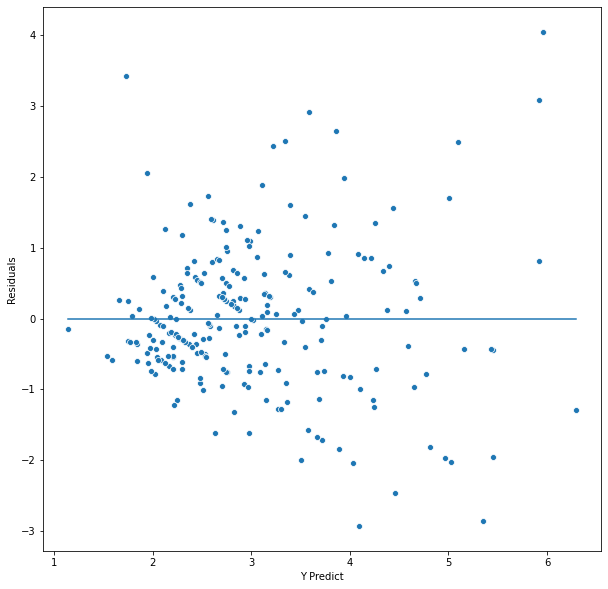

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Y Predict')
plt.ylabel('Residuals')
plt.show()

1. mean=0 --> terpenuhi
2. uncorrelated --> terpenuhi
3. constant variance --> tidak terpenuhi

## Multicollinearity

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
def calc_vif(X):
    # calculating vif
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif
    

In [36]:
calc_vif(tips[['total_bill','size']]) # vif>4, ada multicollinearity

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


**SUMMARY**
1. Dari histogram dan qqplot, residual model cenderung memiliki distribusi normal
2. Residual model berkumpul di sekitar nilai 0 (rata-rata = 0)
3. Tidak ada pola tertentu (uncorrelated)
4. Varians residual tidak konstan (homoscedascity tidak terpenuhi)
5. nilai VIF cukup tinggi (>4): masuk akal karena memang ada hubungan antara `size` dan `total_bill`. Jadi kita bisa memilih salah satu di antara `size` dan `total_bill`.


# Dummy Variables

In [43]:
df_cat= pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta', 'Bogor','Bogor', 'Bekasi', 'Bekasi','Jakarta', 'Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income':[20,15,7,9,12,11,9]
})

In [44]:
df_cat

,Gender,City,Age,Income
0,Male,Jakarta,34,20
1,Female,Bogor,28,15
2,Female,Bogor,23,7
3,Male,Bekasi,26,9
4,Female,Bekasi,29,12
5,Female,Jakarta,25,11
6,Male,Bekasi,25,9


In [53]:
df_dummy=pd.get_dummies(df_cat,drop_first=True, columns=['Gender','City'])
df_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20,1,0,1
1,28,15,0,1,0
2,23,7,0,1,0
3,26,9,1,0,0
4,29,12,0,0,0
5,25,11,0,0,1
6,25,9,1,0,0


## Exercise with data tips

Analyze tips data from seaborn   
- Total Bill and Size as Numerical Independent Variable  
- Sex, smoker, day, and time as Categorical Independent Variable  
- Tips as Dependent Variable  

Analyze the relationship  
Apply Multiple Linear Regression with dummy variable  
Perform Simultant Test and Partial Test  
Check The Assumption  
Interpret the result  
*use α 5%


In [50]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Dummy Variables Preprocessing

In [76]:
tips_dummy = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [77]:
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [54]:
tips_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

### Linear Regression With Dummy Variable

- Y : Tips
- X : Total Bill, size, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun, time_Dinner

In [58]:
fitur = ['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']
target = 'tip' 
sm_lm = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.20e-28
Time:                        11:02:34   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

F test:  
B1-Bk: <0.05: Ada cukup bukti bahwa setidaknya salah satu fitur memiliki pengaruh signifikan terhadap nilai tip.  
        
Partial Test (T-test)

B0= irrelevant
B1 (Total Bill): <0.05, ada cukup bukti bahwa meningkatnya nilai total bill menyebabkan meningkatnya nilai tip
B2-Bk--> tidak ada cukup bukti

Parameter Estimate (coef):

sex_Female: tip yang diberikan oleh female lebih tinggi 0.0324 USD dibandingkan male  
time_Dinner: Tip yang diberikan saat dinner 0.0681 lebih rendah dibanding Lunch  
Day_Fri: Tip yang diberikan pada hari Friday lebih tinggi 0.1623 dibanding hari Thursday  
        


### Diagnostics and Collinearity

#### Normality Assumption

Text(0.5, 0, 'Residuals')

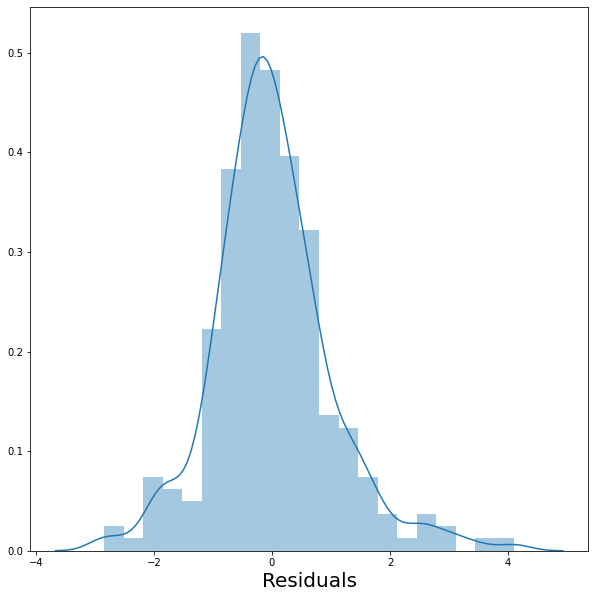

In [61]:
plt.figure(figsize=(10,10))
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

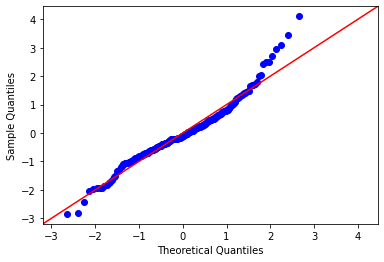

In [62]:
sm.qqplot(result.resid, line = '45')
plt.show()

Text(0, 0.5, 'Residuals')

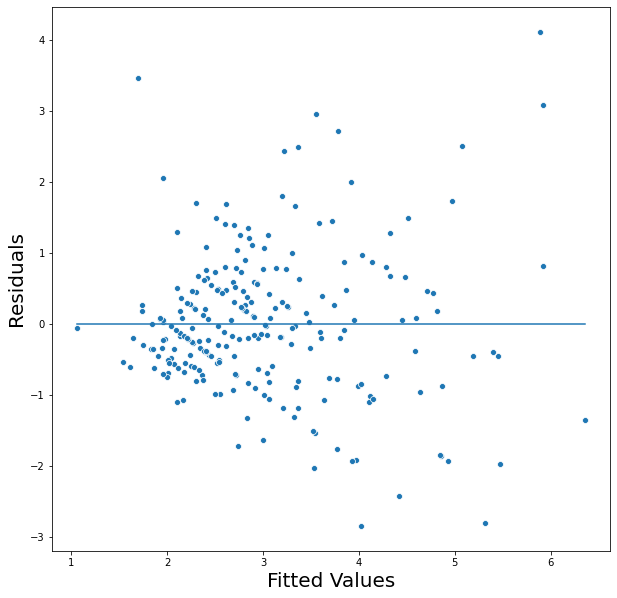

In [63]:
plt.figure(figsize=(10,10))
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

#### Multicollinearity

In [65]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


**SUMMARY**
1. Dari histogram dan qqplot, residual model cenderung memiliki distribusi normal
2. Residual model berkumpul di sekitar nilai 0 (rata-rata = 0)
3. Tidak ada pola tertentu (uncorrelated)
4. Varians residual tidak konstan (homoscedascity tidak terpenuhi)
5. Ada nilai VIF sangat tinggi (>10): masuk akal karena memang ada hubungan antara `size` dan `total_bill`. Jadi kita bisa memilih salah satu di antara `size` dan `total_bill`. `time_dinner` juga memiliki nilai VIF yang sangat tinggi, sehingga bisa kita coba drop.


In [81]:
tips.groupby(['day','time']).count()

total_bill   tip   sex  smoker  size
day  time                                        
Thur Lunch         61.0  61.0  61.0    61.0  61.0
     Dinner         1.0   1.0   1.0     1.0   1.0
Fri  Lunch          7.0   7.0   7.0     7.0   7.0
     Dinner        12.0  12.0  12.0    12.0  12.0
Sat  Lunch          NaN   NaN   NaN     NaN   NaN
     Dinner        87.0  87.0  87.0    87.0  87.0
Sun  Lunch          NaN   NaN   NaN     NaN   NaN
     Dinner        76.0  76.0  76.0    76.0  76.0

#### Model Improvements

Berdasarkan hasil analisa sebelumnya, mari kita coba tingkatkan performa model kita. Gunakan fitur berikut:
- Y : Tips
- X : Total Bill, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun

In [67]:
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']
target = 'tip' 
sm_lm = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           2.35e-29
Time:                        11:23:51   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [69]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


Tidak ada masalah multicollinerity

In [7]:
import pandas as pd

**Latihan**  

Gunakan data MPG.  
* pilihkan fitur yang sesuai untuk dibuat model multi linear regression
* pastikan tidak ada multikolinearity.

In [2]:
mpg= sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg=mpg.dropna()

In [4]:
mpg=mpg.drop(columns='name')

In [9]:
mpg_dummy=pd.get_dummies(mpg, drop_first = True, columns = ['origin'])
mpg_dummy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [10]:
mpg_dummy.corr('spearman')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841,0.450745,-0.571642
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087,-0.419605,0.622349
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582,-0.506861,0.715937
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498,-0.348411,0.519456
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981,-0.475689,0.627426
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306,0.144291,-0.236509
model_year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000,0.198407,-0.135649
origin_japan,0.450745,-0.419605,-0.506861,-0.348411,-0.475689,0.144291,0.198407,1.000000,-0.648583
origin_usa,-0.571642,0.622349,0.715937,0.519456,0.627426,-0.236509,-0.135649,-0.648583,1.000000


In [13]:
calc_vif(mpg_dummy.drop(columns='mpg'))

,variables,VIF
0,cylinders,117.144239
1,displacement,101.522274
2,horsepower,65.199130
3,weight,141.294420
4,acceleration,69.569829
5,model_year,119.151391
6,origin_japan,2.301294
7,origin_usa,7.152934


In [32]:
x=mpg_dummy[['horsepower','origin_japan','origin_usa']]

In [33]:
sm_lm = sm.OLS(mpg_dummy['mpg'], sm.add_constant(x))
result = sm_lm.fit()

In [34]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     253.4
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           4.93e-91
Time:                        18:40:03   Log-Likelihood:                -1148.5
No. Observations:                 392   AIC:                             2305.
Df Residuals:                     388   BIC:                             2321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.3695      0.781     49.098   

In [35]:
calc_vif(x)

,variables,VIF
0,horsepower,5.509269
1,origin_japan,1.571081
2,origin_usa,4.938188
